In [2]:
### Build the environment

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Download data for the gold ETF GLD

In [3]:
date = '20140101'
gld = pdr.get_data_yahoo('GLD', start=date)
gld.drop('Adj Close', axis=1, inplace=True)

# 2. Add MA and instantaneus rate of return

In [6]:
### Adding a couple of columns for the Moving Averages analysis
gld['9_days'] = gld.Open.rolling(9).mean()
gld['21_days'] = gld.Open.rolling(21).mean()

# When the 9 days crosses above the 21 days then we should be long - If 9dys is greater than 21dys = long 
# When the 9 days crosses below the 21 days then we should be short - IF 9dys is less than 21dys = short

### Adding return as an exponential rate
gld['Return'] = np.log(gld.Close).diff()
gld.dropna(inplace=True)
gld.head()

,High,Low,Open,Close,Volume,9_days,21_days,Return
Date,,,,,,,,
2014-03-03,130.589996,129.809998,130.000000,130.289993,11741100,128.207777,125.212857,0.020706
2014-03-04,129.240005,128.320007,128.539993,128.679993,6341700,128.349998,125.588571,-0.012434
2014-03-05,129.339996,128.580002,128.710007,128.889999,4878500,128.567777,125.980952,0.001631
2014-03-06,130.470001,129.470001,129.710007,130.169998,5408900,128.805556,126.423809,0.009882
2014-03-07,129.229996,128.210007,128.250000,129.089996,7575000,128.776667,126.732857,-0.008331


# 3. Plot data and signals

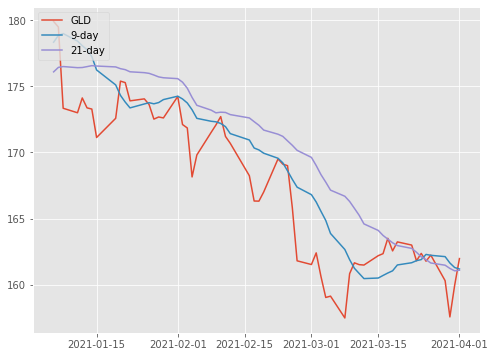

In [12]:
### Visualize how this systems works
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(gld.Close[-60:], label='GLD')
    plt.plot(gld['9_days'][-60:], label='9-day')
    plt.plot(gld['21_days'][-60:], label='21-day')
    plt.legend(loc=2)

# 4. Code Regime - Always long or short

In [13]:
gld['regime'] = np.where(gld['9_days'] > gld['21_days'], 1, -1)

# 5. Calculate return

In [15]:
gld['strat_return'] = gld.Return * gld.regime
gld.tail()

,High,Low,Open,Close,Volume,9_days,21_days,Return,regime,strat_return
Date,,,,,,,,,,
2021-03-26,162.729996,161.649994,161.710007,162.240005,6153200,162.226668,161.646667,0.002839,1,0.002839
2021-03-29,161.520004,159.830002,161.460007,160.309998,8409300,162.126668,161.478096,-0.011967,1,-0.011967
2021-03-30,158.199997,157.550003,157.940002,157.570007,8353200,161.645557,161.235715,-0.017240,1,-0.017240
2021-03-31,160.679993,158.050003,158.059998,159.960007,10623800,161.302224,161.051429,0.015054,1,0.015054
2021-04-01,162.110001,161.279999,161.559998,161.979996,7105200,161.191113,161.096667,0.012549,1,0.012549


# 6. Compare return system vs buy and hold

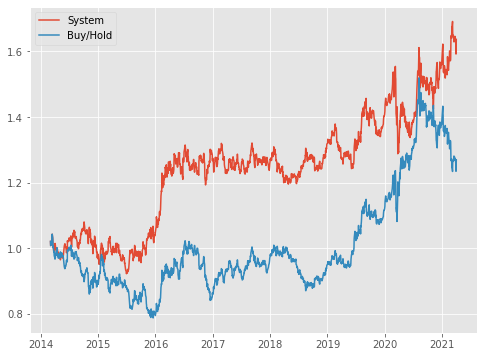

In [18]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(np.exp(gld.strat_return.cumsum()), label='System')
    plt.plot(np.exp(gld.Return.cumsum()), label='Buy/Hold')
    plt.legend()

# 7. Numerically

In [19]:
print("System total return: {:>10.2%}".format(np.exp(gld.strat_return.sum())))
print("Buy/Hold total return: {:>10.2%}".format(np.exp(gld.Return.sum())))

System total return:    163.66%
Buy/Hold total return:    126.92%
